<div style="display: flex; align-items: center;margin-bottom: 30px;color: #8EB944">
    <img src=https://wisoinbox.uni-koeln.de/images/wiso_button_en.png width="80"> 
    <span style="margin-left: 20px;font-size: 50px;font-weight:bold";>Group Project: Strategic Sourcing</span>
</div>

<div>
    <span style="font-size: 20px;font-weight: bold";>Group Members:</span>

<ul>
    <li>Tom Boerrigter | 7419077</li>
    <li>Niklas Sterz | 7419545</li>
</ul>
</div>

<div>
    <span style ="font-size: 40px; font-weight: bold; color: #8EB944">
        Preparation
    </span>
    
<hr style="color: #8EB944; height: 3px;background-color: #8EB944;border: none">
</div>

In [1]:
# import the most important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="margin-top: 30px; margin-bottom: 10px;">   
    <span style ="font-size: 40px; font-weight: bold; color: #8EB944; align: center">
        Day 1
    </span>
    <hr style="color: #8EB944; height: 3px;background-color: #8EB944;border: none"> 
    </div>
    
  <span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
        1. Calculate the additional cost of vitronium per supplier
</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none"> 

<p style ="font-size: 15px;">The additional cost per tonne of vitronium are summarized in the following table: </p>
<table style="text-align: center; font-size:15px;">
  <tr>
    <th></th>
    <th>ChemCo</th>
    <th>Handle</th> 
    <th>Ulme</th>
  </tr>
  <tr>
    <td style="font-weight: bold; text-align: left;">transportation cost / tonne</td>
    <td>15€</td>
    <td>20€</td> 
    <td>5€</td>
  </tr>
  <tr style="border-bottom: 3px solid;">
    <td style="font-weight: bold; text-align: left;">setup cost / tonne</td>
    <td>35€</td>
    <td>15€</td> 
    <td>---</td>
  </tr>
    <tr>
    <td style="font-weight: bold; text-align: left;">additional cost / tonne</td>
    <td>50€</td>
    <td>35€</td> 
    <td>5€</td>
  </tr>
</table>
<p style ="font-size: 15px;">The transportation cost per tonne are mentioned in the CPO's e-mail. The setup cost per tonne can easily be calculated by dividing the fixed setup cost by 100,000, which is the total amount of vitronium needed. <br></p>
    
<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
        2. For which demand is ChemCo's additional cost per tonne lower than Handle's?
</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none"> 
<p style ="font-size: 15px;">In order to get the demand for which the price of ChemCo's additional cost per tonne of Vitronium is cheaper than Handle's, we need to equalize the two cost functions and solve the resulting euqation for x:
$$ 15x + 350000 \stackrel{!}{=} 20x + 1500000 \qquad | -15x \quad |-1500000 $$
$$ 2000000 = 5x \qquad | /5 $$
$$ x \geq 400000 $$
<p style ="font-size: 15px;">
    <b>Answer:</b> Hence, if the ordered amount exceeds 400,000 units of vitronoium, ChemCo's offer will be cheaper.</p>

<div style="margin-top: 30px; margin-bottom: 10px;">   
    <span style ="font-size: 40px; font-weight: bold; color: #8EB944; align: center">
        Day 2
    </span>
    <hr style="color: #8EB944; height: 3px;background-color: #8EB944;border: none"> 
    </div>

<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
        1. Simulate 10,000 auctions using the cost information above.
</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">

<p style ="font-size: 15px;">
    <b>Explanation:</b> To simulate the auctions, we first create two empty dictionaries, 'results' and 'winners'. We then loop through each of the auctions, generating costs for each supplier using the information from the exercise. The resulting bids are then stored in the 'results' dictionary with the name and bid of the three suppliers. Then the name of the supplier with the lowest cost (winner) and the cost of the lowest cost supplier (winner price) are stored in the 'winners' dictionary.
</p>

In [2]:
# define a function to simulate the auctions
def simulate_auction(num_times:int):
    # Create one dict for the results and one dict for the winners
    results = {}
    winners = {}
    
    # Use a for loop to simulate each auction
    for n in range(num_times):
        
        # Generate the bid price for each supplier and round to two digits to get the price in euros
        chemco = round(np.random.uniform(10,30),2)
        handle = round(np.max([0,np.random.normal(35,10)]),2)
        ulme = round(np.max([0,np.random.normal(65,10)]),2)
        results[n] = [[chemco, "ChemCo"], [handle, "Handle"], [ulme, "Ulme"]]    
        
    # Populate the winners dict with the lists that contain the highest price in each auction
    for key, arrays in results.items():
        # Find the array with the lowest value and second lowest value
        sorted_arrays = sorted(arrays, key=lambda x: x[0])
        lowest = sorted_arrays[0]
        second_lowest = sorted_arrays[1]
    
        # Store the result in the new dictionary
        winners[key] = [second_lowest[0],lowest[1]]
        
    return results, winners

In [3]:
# Simulate the 10000 auctions
np.random.seed(42)
results_10000, winners_10000 = simulate_auction(10000)

<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
        2. Determine the auction price in each of these 10,000
     auctions.
</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">

<p style ="font-size: 15px;">
    <b>Explanation:</b> We retrieve the first 10 simulation runs from the 'winners' dictionary. We observe that ChemCo won the first ten auctions.
</p>

In [4]:
# Print the auction winner and price for 10 auctions
for i in range(10):
    print(f"Auction {i+1}: Winner: {winners_10000[i][1]} | Price: {winners_10000[i][0]}€")

Auction 1: Winner: ChemCo | Price: 23.88€
Auction 2: Winner: ChemCo | Price: 50.79€
Auction 3: Winner: ChemCo | Price: 29.19€
Auction 4: Winner: ChemCo | Price: 37.42€
Auction 5: Winner: ChemCo | Price: 43.16€
Auction 6: Winner: ChemCo | Price: 25.92€
Auction 7: Winner: ChemCo | Price: 28.71€
Auction 8: Winner: ChemCo | Price: 29.56€
Auction 9: Winner: ChemCo | Price: 29.0€
Auction 10: Winner: ChemCo | Price: 28.98€


<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
        3. Determine the average auction price.
</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">

<p style ="font-size: 15px;">
    <b>Explanation:</b> We retrieve all of the 10000 auction prices from the 'winners' dictionary and calculate and display the mean.
</p>

In [5]:
# Create an array with the winning price of each auction
winning_prices = [winners_10000[i][0] for i in range(len(winners_10000))]

# Calculate and print the mean
mu = np.round(np.mean(winning_prices),2)

print(f"The average auction price is {mu}€.")

The average auction price is 35.46€.


<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
        4. With which probability can we expect
     Ulme to win the auction in three weeks?
</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">

<p style ="font-size: 15px;"><b>Assumption:</b> We have interpreted the task as referring to empirical probability rather than the ex-ante theoretical probability. Therefore, we must count the number of times Ulme won a simulated auction and divide the result by 10,000 to determine the empirical probability. </p>


In [6]:
# Create a list that contains the winners name of each auction
winner_names = [winners_10000[i][1] for i in range(len(winners_10000))]

# Count the number of times Ulme won 
num_ulme = winner_names.count('Ulme')
percentage_ulme = (num_ulme/10000)

print(f"Ulme won the auction {num_ulme} times. Thus the expected probability of them winning is {percentage_ulme*100}%")

Ulme won the auction 0 times. Thus the expected probability of them winning is 0.0%



<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
        5. What is the variance of the auction price according to
     1.  and 2.  if you simulate 10, 100, 1,000, 10,000, and
     100,000 auctions?
</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">


In [7]:
# Create a list with the number of auction we want to simulate
num_auctions = [10,100,1000,10000,100000]
np.random.seed(42)

# Create an empty list to store the variances
var_winners = []

# Create a dict to store the winning prices for each number of auctions
auction_prices_num = {}

# Create a dict to store the winner of each auction
auction_winners_num = {}

for auctions in num_auctions:
    
    # Simulate the auctions and get the winning prices
    results, winners = simulate_auction(auctions)
    winning_prices = [winners[i][0] for i in range(len(winners))]
    
    # Count how many times each supplier won
    winner_names_num = [winners[i][1] for i in range(len(winners))]
    auction_winners_num[auctions] = winner_names_num
    
    # Append the winning prices to the dict
    auction_prices_num[auctions] = winning_prices
    
    # Calculate the variance and add it to the list
    variance = np.round(np.var(winning_prices),4)
    var_winners.append(variance)

In [8]:
print("Results:")
for i in range(5):
    print(f"Variance for {num_auctions[i]} auctions: {var_winners[i]}")

Results:
Variance for 10 auctions: 64.8312
Variance for 100 auctions: 79.3415
Variance for 1000 auctions: 79.6009
Variance for 10000 auctions: 84.1928
Variance for 100000 auctions: 82.275


<p style ="font-size: 15px;"><b>Explanation:</b> The variance of the auctions seems to increase with the number of simulations. At first glance, this may seem counterintuitive, as most would expect the variance to be lower for a higher number of simulations when using probability distributions. To find the reason, we can visualise the data:</p>

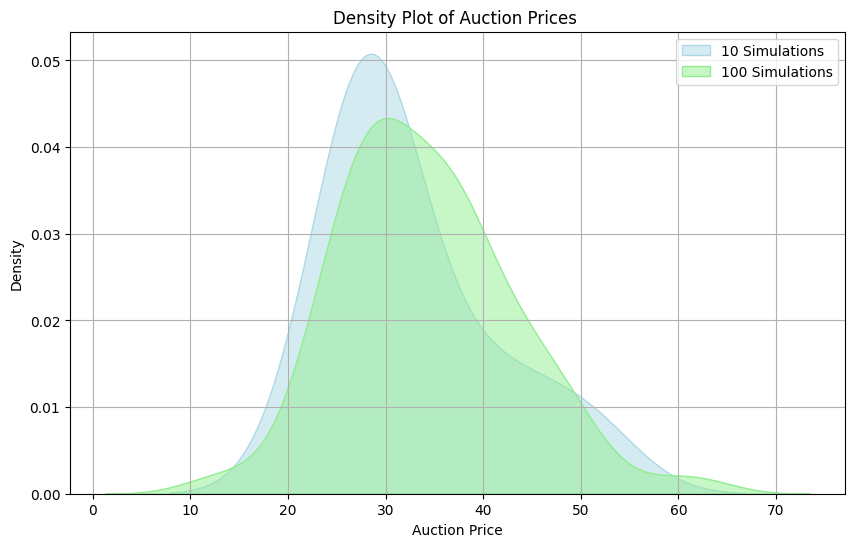

In [9]:
# Get the data for 10 and 100 auctions
data = auction_prices_num[10]
data2 = auction_prices_num[100]

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, fill=True, color="lightblue", alpha=0.5,label="10 Simulations")
sns.kdeplot(data=data2, fill=True, color="lightgreen", alpha=0.5,label="100 Simulations")

# Customize the plot
plt.title("Density Plot of Auction Prices ")
plt.legend()
plt.xlabel("Auction Price")
plt.ylabel("Density")
plt.grid(True)
plt.show()


<p style ="font-size: 15px;"><b>Analysis:</b> This plot visualizes the variance for 10 and 100 auctions, respectively. The density plot of the 10 auctions shows a higher variance than that of the 100 auctions. Due to the small sample size of the 10 auctions, ChemCo wins all the auctions because its probability of winning is much higher than the probability of winning for Handle and Ulme. Thus, the numbers are drawn from the same standard distribution with $\mu = 35$ and $\sigma = 10$. On the other hand, Handle wins a considerable amount when the auction is simulated 100 times. The auction price is drawn 13 times from Ulme's distribution with completely different parameters of $\mu = 65$ and $\sigma = 15$. This results in a much more complex function and thus a higher variance. The distributions of winners for different numbers of simulation runs are presented in the cell below.</p>

In [10]:
print("Number of times Handle and ChemCo won the auction for each number of simulations: \n")
for auction in num_auctions:
    print(f"{auction} Auctions: \nHandle: {auction_winners_num[auction].count('Handle')} \nChemCo: {auction_winners_num[auction].count('ChemCo')} \nUlme: {auction_winners_num[auction].count('Ulme')}\n")

Number of times Handle and ChemCo won the auction for each number of simulations: 

10 Auctions: 
Handle: 0 
ChemCo: 10 
Ulme: 0

100 Auctions: 
Handle: 13 
ChemCo: 87 
Ulme: 0

1000 Auctions: 
Handle: 97 
ChemCo: 903 
Ulme: 0

10000 Auctions: 
Handle: 977 
ChemCo: 9023 
Ulme: 0

100000 Auctions: 
Handle: 9701 
ChemCo: 90298 
Ulme: 1



<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
         6. How much lower is the
     expected auction price if Handle qualifies?

</span>

<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">
<p style ="font-size: 15px;"><b>Explanation:</b> To get the new expected auction price, we first modify the function 'simulate_auction' from the first part of the task to exclude Handle. We then rerun steps 2 to 4 to calculate the new results and the difference in the expected auction price.  </p>

In [11]:
# Modify the simulate_auction function to exclude Handle from the auction
def simulate_auction_2(num_times:int):
    # Create one dict for the results and one dict for the winners
    results = {}
    winners = {}
    
    # Use a for loop to simulate each auction
    for n in range(num_times):
        
        # Generate the bid price for each supplier and round to two digits to get the price in euros
        chemco = round(np.random.uniform(10,30),2)
        ulme = round(np.max([0,np.random.normal(65,10)]),2)
        results[n] = [[chemco, "ChemCo"], [ulme, "Ulme"]]    
        
    # Populate the winners dict with the lists that contain the highest price in each auction
    for key, arrays in results.items():
        # Find the array with the lowest value and second lowest value
        sorted_arrays = sorted(arrays, key=lambda x: x[0])
        lowest = sorted_arrays[0]
        second_lowest = sorted_arrays[1]
    
        # Store the result in the new dictionary
        winners[key] = [second_lowest[0],lowest[1]]
        
    return results, winners

In [12]:
# Simulate the auction without Handle
np.random.seed(42)
results_new, winners_new = simulate_auction_2(10000)

In [13]:
# Print the auction winner and price for 10 auctions
for i in range(10):
    print(f"Auction {i+1}: Winner: {winners_new[i][1]} | Price: {winners_new[i][0]}€")

Auction 1: Winner: ChemCo | Price: 53.88€
Auction 2: Winner: ChemCo | Price: 68.19€
Auction 3: Winner: ChemCo | Price: 67.79€
Auction 4: Winner: ChemCo | Price: 75.11€
Auction 5: Winner: ChemCo | Price: 59.19€
Auction 6: Winner: ChemCo | Price: 59.75€
Auction 7: Winner: ChemCo | Price: 38.87€
Auction 8: Winner: ChemCo | Price: 74.5€
Auction 9: Winner: ChemCo | Price: 60.72€
Auction 10: Winner: ChemCo | Price: 57.58€


In [14]:
# Create an array with the winning price of each auction
winning_prices_new = [winners_new[i][0] for i in range(len(winners_new))]

# Calculate and print the mean and the difference to the old auction price
mu_new = np.mean(winning_prices_new)
difference_mu = np.round(mu_new - mu,2)

print(f"The average auction price is {np.round(mu_new,2)} Euros. Thus, Handle competing lowers the expected auction price by {difference_mu}€.")

The average auction price is 64.95 Euros. Thus, Handle competing lowers the expected auction price by 29.49€.


In [15]:
# Create a list that contains the winners name of each auction
winner_names_new = [winners_new[i][1] for i in range(len(winners_new))]

# Count the number of times Ulme won 
num_ulme_new = winner_names_new.count('Ulme')
percentage_ulme_new = (num_ulme_new/10000)

# Calculate difference between the old and new percentage
difference_percentage = np.round(percentage_ulme_new - percentage_ulme,4)

print(f"Ulme won the auction {num_ulme_new} times. Thus the expected probability of them winning is {percentage_ulme_new*100}%. " 
      f"This is {difference_percentage*100}% higher than when Handle still competed.")

Ulme won the auction 0 times. Thus the expected probability of them winning is 0.0%. This is 0.0% higher than when Handle still competed.


<p style="font-size: 15px;"><b>Explanation:</b> The expected auction price is now €29.49 higher compared to when Handle was still qualified. This is partly due to the fact that Handle sometimes won the auction. However, the main reason is that since we ran a second price auction, the auction price- before excluding Handle- was mainly determined by Handle's cost distribution, as they came second in most auctions. Now Ulme's costs determine the auction price, and as their distribution mean is €30 higher, the expected auction price also increases by roughly €30.</p>

<div style="margin-top: 30px; margin-bottom: 10px;">   
    <span style ="font-size: 40px; font-weight: bold; color: #8EB944; align: center">
        Day 3
    </span>
    <hr style="color: #8EB944; height: 3px;background-color: #8EB944;border: none"> 
    </div>

<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
         1. Use yesterday’s results to determine the probability of winning for each supplier.


</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">

<p style="font-size: 15px;"><b>Assumption:</b> As before, we assume the winning probability to be the empirical probability rather than the theoretical one.
    
<p style="font-size: 15px;">To get the probability of winning for each supplier, we first use python's included 'count' function to count the number of occurances of each supplier in the 'winner_names' list. We then divide this number by the total number of simulations to get the empirical probability for each supplier.</p>

In [16]:
# Count the number of times Handle and ChemCo won the initial auctions
num_handle = winner_names.count("Handle")
num_chemco = winner_names.count("ChemCo")

# Determine the probability of winning for Handle and ChemCo
percentage_handle = (num_handle/10000)
percentage_chemco = (num_chemco/10000)

# Print the final probabilities
print(f"The probability to win the auction for each supplier looks as follows: \nUlme: {round(percentage_ulme*100,2)}%, \nHandle: {round(percentage_handle*100,2)}% \nChemCo: {round(percentage_chemco*100,2)}%")

The probability to win the auction for each supplier looks as follows: 
Ulme: 0.0%, 
Handle: 9.87% 
ChemCo: 90.13%


<p style="font-size: 15px;"><b>Observation:</b> We can observe that ChemCo dominated the second price auction, winning more than 90%. Ulme, on the other hand, did not win any auction. This is expected in a price only auction, as the cost distributions are asymmetric and do just slightly overlap. 

<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
         2. Compute the expected total cost to Beier of buying 100,000 tonnes of Vitronium.


</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">

<p style ="font-size: 15px;"><b>Explanation:</b> To calculate the total cost of ownership, we first need to multiply the average auction price by 100,000 to get the total ex-factory price. Then we add the transport and adjustment costs for each of the suppliers, multiplied by the winning probability for each. This results in the following formula:
$$ \mu * 100,000 + \sum_{i \in I} p_i * (ac_i + 100,000 * tc_i) $$
Where $\mu$ is the average price from the 10,000 auctions. $I$ denotes the set of all three suppliers, $ac_i$ is the adjustment cost for supplier $i$ and $tc_i$ is the transport cost for supplier $i$. $p_i$ is the probability with which each supplier is expected to win the auction.

</p>

In [17]:
total_cost_ownership = mu * 100000 + percentage_handle * (1500000 + 100000 * 20) + percentage_chemco * (3500000 + 100000 * 15) + percentage_ulme * (100000 * 5)

print(f"The total cost of ownership amount to {round(total_cost_ownership,2):,}€.")

The total cost of ownership amount to 8,397,950.0€.


<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
        3. What is the expected total cost to Beier if we run a na ̈ıve scoring auction instead?


</span>
<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">
<p style ="font-size: 15px;"><b>Explanation:</b> We now need to adapt our code to run the naive scoring auction. First, we need to generate the bid price for each supplier by drawing from their cost distribution. However, we must also  add the additional cost per tonne as calculated on Day 1. This yields the final score, which is used to determine the winner of the auction. 
    
<p style ="font-size: 15px;"><b>Assumption:</b> To make it a fair comparison to the previous tasks, we also need to run a second price auction. However, this causes some problems: <br>
Imagine a situation with the following costs by the suppliers:</p>
    <table style="text-align: center; font-size: 15px;">
        <tr>
            <th>Supplier</th>
            <th>Bid</th>
            <th>Add. Cost</th>
            <th>Score</th>
        </tr>
        <tr>
            <td>Ulme</td>
            <td>40</td>
            <td>5</td>
            <td>45</td>
        </tr>
        <tr>
            <td>Handle</td>
            <td>30</td>
            <td>35</td>
            <td>65</td>
        </tr>
        <tr>
            <td>Chemco</td>
            <td>40</td>
            <td>50</td>
            <td>90</td>
        </tr>
    </table>
    
<p style ="font-size: 15px; text-align: justify;">In this situation Ulme wins the auction due to them having the lowest score. In a second price auction, they would get the bid of Handle who had the second lowest cost. However, their price is actually lower than Ulme's which is obviously unfair. If we decided to run a first price naive scoring auction, Ulme would win and just get their cost covered, making them indifferent about winning the auction. <br> 
    
<p style ="font-size: 15px;"><b>Assumption:</b> To counteract these effects, we decided to set the second highest score as the winning price, as this method is the only one which leaves a possibility for the supplier to make a profit. Without this possibility, it would not be a weakly dominant strategy for the suppliers to bid their cost. This method results in a significantly higher average auction price, but lower expected adjustment and transportation cost for Beier.</p>

In [18]:
# Define the additional cost from the first task
ulme_ac = 5
handle_ac = 35
chemco_ac = 50

# define a function to simulate the auctions
def simulate_naive_auction(num_times:int):
    # Create one dict for the results and one dict for the winners
    results = {}
    winners = {}
    
    # Use a for loop to simulate each auction
    for n in range(num_times):
        
        # Generate the bid price for each supplier and round to two digits to get the price in euros
        chemco = round(np.random.uniform(10,30),2)
        handle = round(np.max([0,np.random.normal(35,10)]),2) 
        ulme = round(np.max([0,np.random.normal(65,10)]),2) 
        results[n] = [[np.round(chemco_ac + chemco,2), chemco, "ChemCo"], 
                      [np.round(handle + handle_ac,2),handle, "Handle"], 
                      [np.round(ulme + ulme_ac,2), ulme, "Ulme"]]    
        
    # Populate the winners dict with the lists that contain the highest price in each auction
    for key, arrays in results.items():
        # Find the array with the lowest value and second lowest value
        sorted_arrays = sorted(arrays, key=lambda x: x[0])
        lowest = sorted_arrays[0]
        second_lowest = sorted_arrays[1]
    
        # Store the result in the new dictionary
        winners[key] = [second_lowest[0], lowest[2]]
        
    return results, winners

In [19]:
# Simulate the naive scoring auction
np.random.seed(42)
results_naive, winners_naive = simulate_naive_auction(10000)

In [20]:
# Create an array with the winning price of each auction
winning_prices_naive = [winners_naive[i][0] for i in range(len(winners_naive))]

# Calculate and print the mean and the difference to the old auction price
mean_naive = np.mean(winning_prices_naive)

# Print the new mean bid price
print(f"New average auction price with the naive scoring system: €{mean_naive:.2f}")

New average auction price with the naive scoring system: €70.01


In [21]:
# Create a list that contains the winners name of each auction
winner_names_naive = [winners_naive[i][1] for i in range(len(winners_naive))]

# Count the number of times Handle and ChemCo won the initial auctions
num_handle_naive = winner_names_naive.count("Handle")
num_chemco_naive = winner_names_naive.count("ChemCo")
num_ulme_naive = winner_names_naive.count("Ulme")

# Determine the probability of winning for Handle and ChemCo
percentage_handle_naive = (num_handle_naive/10000)
percentage_chemco_naive = (num_chemco_naive/10000)
percentage_ulme_naive = (num_ulme_naive/10000)

# Print the final probabilities
print(f"The probability to win the auction for each supplier looks as follows: \nUlme: {round(percentage_ulme_naive*100,4)}%, \nHandle: {round(percentage_handle_naive*100,4)}% \nChemCo: {round(percentage_chemco_naive*100,4)}%")

The probability to win the auction for each supplier looks as follows: 
Ulme: 35.41%, 
Handle: 35.13% 
ChemCo: 29.46%


In [22]:
# Calculate the Total Cost of Ownership as before
total_cost_ownership_naive = mean_naive * 100000 + percentage_handle_naive * (1500000 + 100000 * 20) + percentage_chemco_naive * (3500000 + 100000 * 15) + percentage_ulme_naive * (100000 * 5)

print(f"Answer: The total costs of ownership amount to {round(total_cost_ownership_naive,2):,}€.")

Answer: The total costs of ownership amount to 9,880,740.4€.


<span style ="font-size: 22px; font-weight: bold;color: #507F7F;">
        4. Is running a na ̈ıve scoring auction better in terms of the total cost of ownership?


<hr style="color: #8EB944; height: 1px;background-color: #507F7F;border: none">
<p style ="font-size: 15px;"><b>Analysis:</b> Let us first visualize and analyze the expected prices and the winning percentages of the two different types of auctions. <br>

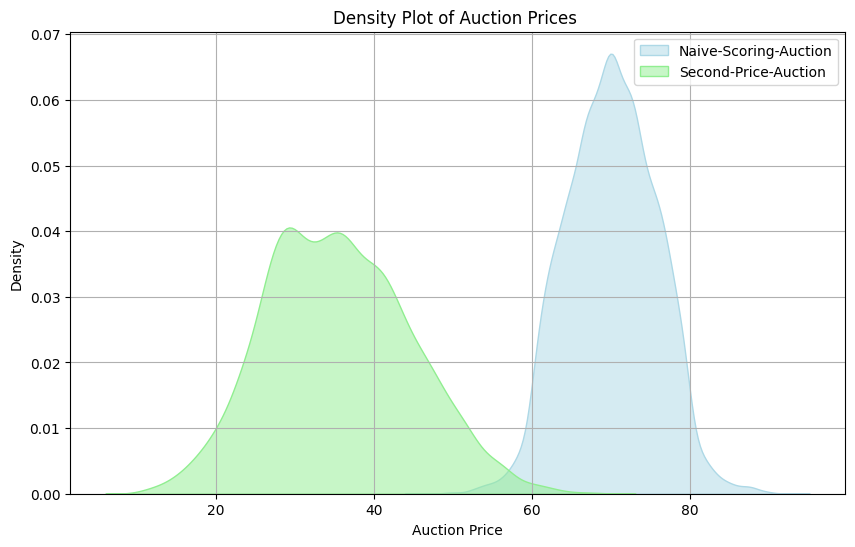

In [23]:
# Get the data from the simulations
data = winning_prices_naive
data2 = auction_prices_num[10000]

# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, fill=True, color="lightblue", alpha=0.5,label="Naive-Scoring-Auction")
sns.kdeplot(data=data2, fill=True, color="lightgreen", alpha=0.5,label="Second-Price-Auction")

# Customize the plot
plt.title("Density Plot of Auction Prices ")
plt.legend()
plt.xlabel("Auction Price")
plt.ylabel("Density")
plt.grid(True)
plt.show()

<p style="text-align: justify; font-size: 15px"><b>Interpretation:</b> As expected, the average auction price is now much higher than before. This is due to the fact that the price is now the sum of the second highest bid and the additional cost. Furthermore, the narrower shape of the distribution indicates a lower variance. To understand this, we need to look at the new distribution means: </p>

<table style="text-align: center; font-size: 15px;">
        <tr>
            <th>Supplier</th>
            <th>Old Mean</th>
            <th>Penalty</th>
            <th>New Mean</th>
        </tr>
        <tr>
            <td>Ulme</td>
            <td>65</td>
            <td>5</td>
            <td>70</td>
        </tr>
        <tr>
            <td>Handle</td>
            <td>35</td>
            <td>35</td>
            <td>70</td>
        </tr>
        <tr>
            <td>Chemco</td>
            <td>20</td>
            <td>50</td>
            <td>70</td>
        </tr>
</table>

<p style="text-align: justify; font-size: 15px">While the cost distribution functions are significantly different for the three suppliers, the score-adjusted distributions all have the same mean of 70. This leads to the shape of the density plot shown above because the price is drawn from a distribution with a mean of 70, regardless of who wins.</p>

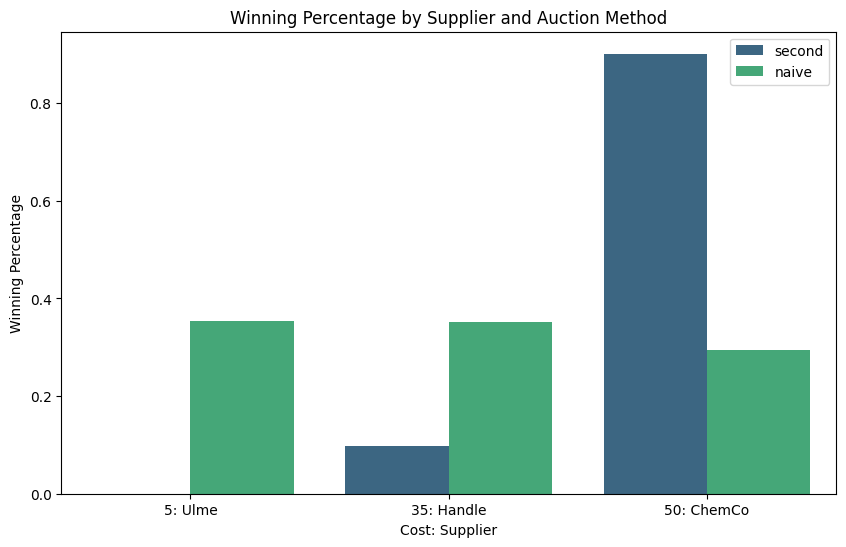

In [24]:
# Collect the data from both the naive auction and the second-price auction from Day 2
data_auctions = {
    "values": [percentage_ulme,percentage_ulme_naive, percentage_handle,percentage_handle_naive, percentage_chemco,percentage_chemco_naive],
    "auction": ['second','naive','second','naive','second','naive'],
    "prices": ['5: Ulme', '5: Ulme', '35: Handle','35: Handle', '50: ChemCo', '50: ChemCo']
}

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=data_auctions,x='prices', y='values', hue='auction',palette='viridis')

# Customize the plot
plt.title('Winning Percentage by Supplier and Auction Method')
plt.xlabel('Cost: Supplier')
plt.ylabel('Winning Percentage')

# Show plot
plt.show()

<p style="text-align: justify; font-size: 15px"><b>Answer:</b> This plot shows each supplier's empirical probability of winning the auction depending on whether we run a second-price auction or a naive-scoring auction. While Chemco wins most auctions when we run a second-price auction, they are significantly penalized in a scoring auction. They would incur additional costs of 5 Million for a volume of 100,000 tonnes for Beier in case of winning the auction. The distribution of wins is much more even due to this penalty. This significantly reduces the expected additional cost, mitigating the higher average auction price in a naive scoring auction. 
    
<p style="text-align: justify; font-size: 15px">However, the higher avereage auction price (70 compared to 35 before) outweighs the reduced additional cost, so we should choose a standard second-price procurement auction. The Total cost of ownership of the naive scoring auction is 9,880,740.4 €, whereas the total cost of ownership for the second-price procurement auction is 8,397,950.0€. This is an increase of almost 1.5 Million €. Thus, this version of naive scoring selects the efficient supplier, but dampens competition and thus is overall less optimal for Beier.  </p>